# Loan Default Risk
### Project Based Intern: Data Scientist ID/X Partners
### By Muhammad Naufal Rafi

# Business Understanding

## Konteks
Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

## Latar Belakang
Latar belakang dari pernyataan di atas adalah tentang tugas untuk membangun model prediksi risiko kredit. Perusahaan telah menyediakan dataset yang terdiri dari data pinjaman yang diterima dan ditolak. Tujuan dari tugas ini adalah untuk mengembangkan sebuah model yang dapat memprediksi apakah calon peminjam akan menjadi kredit yang baik atau buruk, berdasarkan data historis tentang pinjaman yang telah disetujui dan ditolak.

Model ini akan membantu perusahaan untuk mengambil keputusan yang lebih akurat dalam menyetujui atau menolak pinjaman berdasarkan risiko kredit yang ditentukan. Dalam hal ini, model dapat membantu perusahaan untuk meminimalkan risiko kredit, sehingga dapat meningkatkan kinerja bisnis dan memastikan kesehatan keuangan perusahaan.

Selain membangun model, tugas ini juga mencakup persiapan media visual untuk mempresentasikan solusi kepada klien. Media visual ini akan membantu perusahaan untuk memahami secara jelas bagaimana model bekerja dan bagaimana model dapat membantu perusahaan dalam pengambilan keputusan yang lebih baik.

## Tujuan
Berdasarkan pernyataan sebelumnya, berikut adalah beberapa goals yang dapat diidentifikasi:

Membangun model prediksi risiko kredit yang akurat: Tujuan utama dari tugas ini adalah untuk mengembangkan model prediksi risiko kredit yang dapat memprediksi apakah calon peminjam akan menjadi kredit yang baik atau buruk, berdasarkan data historis tentang pinjaman yang telah disetujui dan ditolak. Model harus dapat memberikan hasil yang akurat dan dapat diandalkan untuk membantu perusahaan dalam pengambilan keputusan kredit.

Meningkatkan kinerja bisnis: Model prediksi risiko kredit yang akurat dapat membantu perusahaan meminimalkan risiko kredit dan meningkatkan kinerja bisnis. Dengan menggunakan model ini, perusahaan dapat menyetujui atau menolak pinjaman berdasarkan risiko kredit yang ditentukan dengan lebih akurat, sehingga dapat mengurangi kemungkinan kegagalan pinjaman dan mengoptimalkan pendapatan.

# Metrik Evaluasi
Sebagai bank yang bertanggung jawab, kami memprioritaskan untuk meminimalkan risiko gagal bayar dari peminjam kami. Oleh karena itu, penting bagi kami untuk dapat mengidentifikasi secara akurat calon peminjam yang berpotensi gagal bayar. Namun, kami juga tidak ingin menolak peminjam yang sebenarnya dapat membayar pinjaman mereka tepat waktu. Oleh karena itu, kami memilih untuk memfokuskan upaya kami pada recall untuk memastikan bahwa setiap calon peminjam yang berpotensi gagal bayar dapat diidentifikasi dengan baik, bahkan jika itu berarti beberapa calon peminjam yang sebenarnya dapat membayar harus ditolak. Dengan demikian, kami dapat meminimalkan risiko gagal bayar dan memastikan keberlangsungan bisnis kami dalam jangka panjang.

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler

from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve


from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df = df[['acc_now_delinq', 'all_util', 'annual_inc', 'application_type',
         'dti_joint', 'emp_length', 'funded_amnt', 'grade', 'home_ownership',
         'il_util', 'initial_list_status', 'inq_last_12m', 'int_rate', 'last_pymnt_amnt',
         'loan_amnt', 'purpose', 'recoveries', 'term', 'verification_status', 'loan_status']]

In [5]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ["features", "missing_value"]
df_null['Percentage'] = (df_null["missing_value"]/df.shape[0])*100
df_null.sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,4,dti_joint,466285,100.000000
1,9,il_util,466285,100.000000
2,1,all_util,466285,100.000000
3,11,inq_last_12m,466285,100.000000
4,5,emp_length,21008,4.505399
5,0,acc_now_delinq,29,0.006219
6,2,annual_inc,4,0.000858
7,13,last_pymnt_amnt,0,0.000000
8,18,verification_status,0,0.000000
9,17,term,0,0.000000


In [6]:
to_drop = df_null[df_null['Percentage']>25]['features']
to_drop

df.drop(to_drop, axis=1, inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445248 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acc_now_delinq       445248 non-null  float64
 1   annual_inc           445248 non-null  float64
 2   application_type     445248 non-null  object 
 3   emp_length           445248 non-null  object 
 4   funded_amnt          445248 non-null  int64  
 5   grade                445248 non-null  object 
 6   home_ownership       445248 non-null  object 
 7   initial_list_status  445248 non-null  object 
 8   int_rate             445248 non-null  float64
 9   last_pymnt_amnt      445248 non-null  float64
 10  loan_amnt            445248 non-null  int64  
 11  purpose              445248 non-null  object 
 12  recoveries           445248 non-null  float64
 13  term                 445248 non-null  object 
 14  verification_status  445248 non-null  object 
 15  loan_status      

In [9]:
df.term.value_counts()

 36 months    320728
 60 months    124520
Name: term, dtype: int64

In [10]:
df['term_months'] = df['term'].str[:3].astype('int')

In [11]:
df['term_year'] = df['term_months'] // 12

In [12]:
df.drop(columns='term', inplace=True)

In [13]:
df.grade.value_counts()

B    130790
C    119463
D     73198
A     71773
E     34137
F     12678
G      3209
Name: grade, dtype: int64

In [14]:
df['grade_num'] = df['grade'].replace({
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
})

In [15]:
df.drop(columns='grade', inplace=True)

In [16]:
empl_new = {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6, '7 years' : 7, '8 years' : 8, 'years' : 9, '0    10+ years\ndtype: object' : 10, '10+ years' : 10}
df['emp_length'] = df['emp_length'].map(empl_new)

In [17]:
df.verification_status.value_counts()

Verified           152243
Not Verified       147252
Source Verified    145753
Name: verification_status, dtype: int64

In [18]:
df.loan_status.value_counts()

Current                                                212545
Fully Paid                                             178388
Charged Off                                             40153
Late (31-120 days)                                       6499
In Grace Period                                          3044
Does not meet the credit policy. Status:Fully Paid       1943
Late (16-30 days)                                        1149
Default                                                   784
Does not meet the credit policy. Status:Charged Off       743
Name: loan_status, dtype: int64

In [19]:
to_drop1 = ['Current', 'In Grace Period']
df = df[df.loan_status.isin(to_drop1) == False]

In [20]:
df.loan_status.value_counts()

Fully Paid                                             178388
Charged Off                                             40153
Late (31-120 days)                                       6499
Does not meet the credit policy. Status:Fully Paid       1943
Late (16-30 days)                                        1149
Default                                                   784
Does not meet the credit policy. Status:Charged Off       743
Name: loan_status, dtype: int64

In [21]:
#memilah loan status
low_risk = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#membuat kolom baru untuk mengklasifikasi
df['target'] = np.where(df['loan_status'].isin(low_risk), 0, 1)
     

In [22]:
df.drop(columns='loan_status', inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.target.value_counts()/len(df)

0    0.785819
1    0.214181
Name: target, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220664 entries, 0 to 466283
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acc_now_delinq       220664 non-null  float64
 1   annual_inc           220664 non-null  float64
 2   application_type     220664 non-null  object 
 3   emp_length           220664 non-null  float64
 4   funded_amnt          220664 non-null  int64  
 5   home_ownership       220664 non-null  object 
 6   initial_list_status  220664 non-null  object 
 7   int_rate             220664 non-null  float64
 8   last_pymnt_amnt      220664 non-null  float64
 9   loan_amnt            220664 non-null  int64  
 10  purpose              220664 non-null  object 
 11  recoveries           220664 non-null  float64
 12  verification_status  220664 non-null  object 
 13  term_months          220664 non-null  int32  
 14  term_year            220664 non-null  int32  
 15  grade_num        

In [26]:
df.drop(columns='application_type', inplace=True)

In [27]:
home_ownership = ['MORTGAGE', 'RENT', 'OWN']
df = df[df.home_ownership.isin(home_ownership)]

In [28]:
df.home_ownership.value_counts()

MORTGAGE    108147
RENT         94421
OWN          17884
Name: home_ownership, dtype: int64

In [29]:
df.initial_list_status.value_counts()

f    164269
w     56183
Name: initial_list_status, dtype: int64

In [30]:
df.purpose.value_counts()

debt_consolidation    128707
credit_card            43720
home_improvement       12687
other                  12492
major_purchase          5556
small_business          4518
car                     3246
medical                 2485
wedding                 1938
moving                  1745
house                   1428
vacation                1302
educational              398
renewable_energy         230
Name: purpose, dtype: int64

In [31]:
# create a dictionary to map loan purposes to categories
purpose_dict = {
    'debt_consolidation': 'debt',
    'credit_card': 'debt',
    'home_improvement': 'home',
    'other': 'other',
    'major_purchase': 'major',
    'small_business': 'business',
    'car': 'major',
    'medical': 'major',
    'wedding': 'major',
    'moving': 'home',
    'house': 'home',
    'vacation': 'major',
    'educational': 'other',
    'renewable_energy': 'other'
}

# apply the mapping to create a new column for loan purpose category
df['purpose'] = df['purpose'].map(purpose_dict)

In [32]:
df.purpose.value_counts()

debt        172427
home         15860
major        14527
other        13120
business      4518
Name: purpose, dtype: int64

In [33]:
df.verification_status.value_counts()

Not Verified       78984
Verified           78870
Source Verified    62598
Name: verification_status, dtype: int64

In [34]:
df

,acc_now_delinq,annual_inc,emp_length,funded_amnt,home_ownership,initial_list_status,int_rate,last_pymnt_amnt,loan_amnt,purpose,recoveries,verification_status,term_months,term_year,grade_num,target
0,0.0,24000.0,10.0,5000,RENT,f,10.65,171.62,5000,debt,0.00,Verified,36,3,2,0
1,0.0,30000.0,0.0,2500,RENT,f,15.27,119.66,2500,major,117.08,Source Verified,60,5,3,1
2,0.0,12252.0,10.0,2400,RENT,f,15.96,649.91,2400,business,0.00,Not Verified,36,3,3,0
3,0.0,49200.0,10.0,10000,RENT,f,13.49,357.48,10000,other,0.00,Source Verified,36,3,3,0
5,0.0,36000.0,3.0,5000,RENT,f,7.90,161.03,5000,major,0.00,Source Verified,36,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0.0,37536.0,5.0,8525,MORTGAGE,f,18.25,217.65,8525,major,1159.40,Verified,60,5,4,1
466277,0.0,90000.0,3.0,18000,RENT,f,7.90,563.23,18000,debt,0.00,Verified,36,3,1,1
466278,0.0,42000.0,10.0,10000,RENT,f,18.25,5501.60,10000,major,0.00,Source Verified,36,3,4,0
466281,0.0,78000.0,10.0,22000,MORTGAGE,f,19.97,17.50,22000,debt,0.00,Verified,60,5,4,1


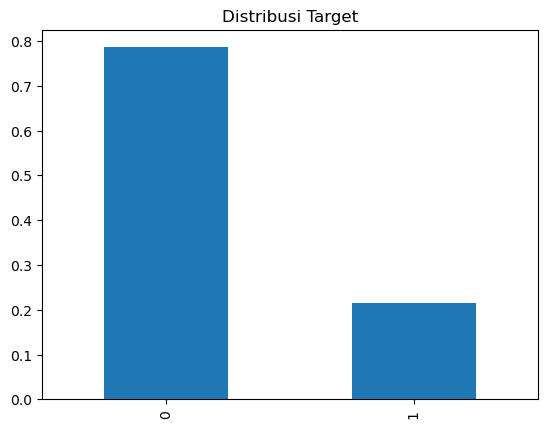

In [35]:
df.target.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribusi Target');

In [36]:
X = df.drop(columns= ['target'])
y = df['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.2)

In [38]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

176361 176361
44091 44091


In [39]:
X.describe().columns

Index(['acc_now_delinq', 'annual_inc', 'emp_length', 'funded_amnt', 'int_rate',
       'last_pymnt_amnt', 'loan_amnt', 'recoveries', 'term_months',
       'term_year', 'grade_num'],
      dtype='object')

In [40]:
X.describe(include='object').columns

Index(['home_ownership', 'initial_list_status', 'purpose',
       'verification_status'],
      dtype='object')

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# fit the transformer to the data and select the top k features based on chi-square test
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['home_ownership', 'initial_list_status', 'purpose',
       'verification_status'])
], remainder='passthrough')

In [42]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [43]:
selector = SelectKBest(score_func=chi2, k=15)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)

In [44]:
selected_features = transformer.get_feature_names_out()[selector.get_support()]
selected_features

array(['onehot__home_ownership_RENT', 'onehot__initial_list_status_w',
       'onehot__purpose_major', 'onehot__purpose_other',
       'onehot__verification_status_Source Verified',
       'onehot__verification_status_Verified', 'remainder__annual_inc',
       'remainder__funded_amnt', 'remainder__int_rate',
       'remainder__last_pymnt_amnt', 'remainder__loan_amnt',
       'remainder__recoveries', 'remainder__term_months',
       'remainder__term_year', 'remainder__grade_num'], dtype=object)

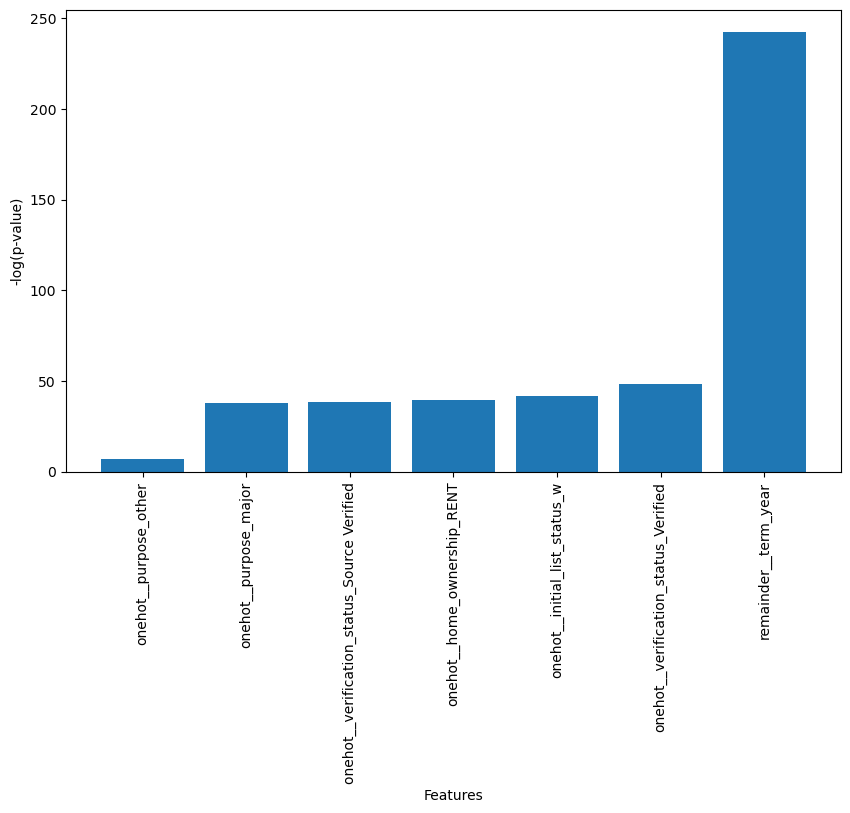

In [45]:
# Get the p-values
p_values = selector.pvalues_
p_values = np.nan_to_num(p_values)

# Sort the features by descending order of -log(p-value)
sorted_idx = (-np.log10(p_values[selector.get_support()])).argsort()

# Plot the sorted p-values
plt.figure(figsize=(10, 6))
plt.bar(selected_features[sorted_idx], -np.log10(p_values[selector.get_support()])[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('-log(p-value)')
plt.xlabel('Features')
plt.show()

In [46]:
# assume X and y are your feature and target matrices
selector = SelectKBest(chi2, k=15)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
selector.fit(X_train_selected, y_train)

# get the chi2 scores for all the features
chi2_scores = selector.scores_
chi2_scores
# create a pandas dataframe to display the chi2 scores
chi2_df = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': chi2_scores})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)
chi2_df

,Feature,Chi2 Score
9,remainder__last_pymnt_amnt,2.314175e+08
11,remainder__recoveries,1.068457e+08
6,remainder__annual_inc,2.408112e+07
7,remainder__funded_amnt,5.186382e+06
10,remainder__loan_amnt,5.164167e+06
8,remainder__int_rate,1.584825e+04
12,remainder__term_months,1.331016e+04
14,remainder__grade_num,7.074124e+03
13,remainder__term_year,1.109180e+03
5,onehot__verification_status_Verified,2.155297e+02


In [60]:
data = df[['last_pymnt_amnt', 'recoveries', 'annual_inc', 'funded_amnt', 'loan_amnt', 'int_rate',
           'grade_num', 'term_year', 'verification_status', 'purpose', 'target']].copy()

In [61]:
# Random sampling without replacement
sample_size = 20000
data = data.sample(n=sample_size, replace=False, random_state=42)

In [62]:
X = data.drop(columns= ['target'])
y = data['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.3)

In [64]:
X.shape

(20000, 10)

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# fit the transformer to the data and select the top k features based on chi-square test
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['annual_inc', 'funded_amnt', 'int_rate',
       'last_pymnt_amnt', 'loan_amnt', 'recoveries',
       'term_year', 'grade_num']),
    ('onehot', OneHotEncoder(drop='first'), ['purpose',
       'verification_status'])
], remainder='passthrough')

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix
from imblearn.over_sampling import ADASYN

In [67]:
# Models
logreg=LogisticRegression(random_state=2023)
KNN=KNeighborsClassifier(n_neighbors=5)
Tree=DecisionTreeClassifier(random_state=2023)
forest=RandomForestClassifier(random_state=2023)
lgbm=LGBMClassifier(random_state=2023)
gboost=GradientBoostingClassifier(random_state=2023)
adaboost=AdaBoostClassifier(random_state=2023)
xgboost=XGBClassifier(random_state=2023)

# OverSampling
ros = RandomOverSampler(random_state=2023)
smote = SMOTE(random_state=2023)
adasyn = ADASYN(random_state=2023)

# UnderSampling
rus = RandomUnderSampler(random_state=2023)
nearmiss = NearMiss()

# Kfold
skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

In [68]:
# Tanpa Resampling
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Decision Tree,0.868712,0.910071,0.795840,0.790119,0.792890,0.868712
Random Forest,0.974190,0.929643,0.780643,0.880454,0.827528,0.875695
Logistic Regression,0.968188,0.916000,0.704337,0.883796,0.783852,0.839364


In [69]:
data.target.value_counts()/len(data)*100

0    78.38
1    21.62
Name: target, dtype: float64

In [70]:
# Tanpa Resampling
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('ros', ros),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Logistic Regression,0.968438,0.886786,0.922365,0.674449,0.779047,0.899668
Random Forest,0.974386,0.927286,0.827229,0.835129,0.831055,0.891059
Decision Tree,0.875608,0.915071,0.806078,0.802281,0.804106,0.875608


In [71]:
# Tanpa Resampling
from sklearn.metrics import balanced_accuracy_score

models = [logreg, Tree, forest]
score = []
rata = []
std = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('rus', rus),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    # std.append(model_cv.std())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean recall', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
Random Forest,0.973773,0.895071,0.924022,0.693191,0.792082,0.905554
Logistic Regression,0.968119,0.886500,0.918733,0.674603,0.777898,0.898171
Decision Tree,0.885052,0.884500,0.886024,0.678816,0.768572,0.885052


jadi pake random forest ros

In [77]:
# GridSearchCV

%time
# algo (benchmark model)
model = RandomForestClassifier()

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resample', ros),
    ('modeling', model)
])

# hyperparameter # modeling__ agar menghindari error, karena kita akan hyperparameter pada model

hyperparam = [
    {
        'modeling__max_depth': list(range(2,5))+[None],
        'modeling__max_features': ['sqrt','log2', None],
        'modeling__min_samples_leaf': list(range(2,5)),
        'modeling__min_samples_split': list(range(2,5))
    }
]


grid_search = GridSearchCV(
                estimator=pipe_model,                  # model yang mau di tuning
                param_grid = hyperparam,               # Hyperparameter
                cv = 5,                                # 10 fold cross validation
                scoring='roc_auc',    
                n_jobs=-1                              # memaksimalkan processor
            )

# fit
grid_search.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['annual_inc',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'last_pymnt_amnt',
                                                                          'loan_amnt',
                                                                          'recoveries',
                                                                          'term_year',
                                                                          'grade_num']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['purpose',
                                                                          'verification_status'])])),
                                       ('resample',
                                        RandomOverSampler(random_state=2023)),
                                       ('modeling', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'modeling__max_depth': [2, 3, 4, None],
                          'modeling__max_features': ['sqrt', 'log2', None],
                          'modeling__min_samples_leaf': [2, 3, 4],
                          'modeling__min_samples_split': [2, 3, 4]}],
             scoring='roc_auc')

In [79]:
grid_search.best_params_

{'modeling__max_depth': None,
 'modeling__max_features': 'sqrt',
 'modeling__min_samples_leaf': 4,
 'modeling__min_samples_split': 4}

RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4703
           1       0.76      0.87      0.81      1297

    accuracy                           0.91      6000
   macro avg       0.86      0.90      0.88      6000
weighted avg       0.92      0.91      0.92      6000

Confusion Matrix:


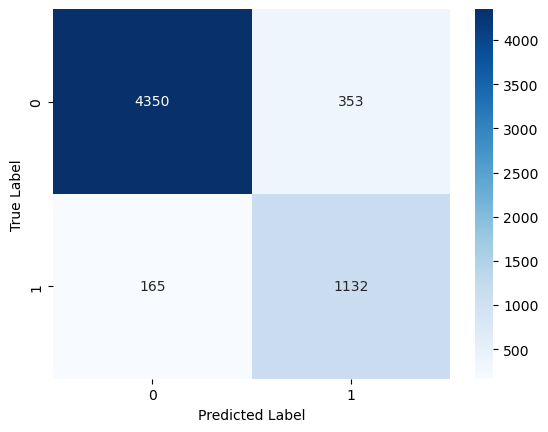

ROC AUC Score: 0.9744113363884106
Balanced Score: 0.8988624364342975




In [80]:
# Define model and pipeline
model = RandomForestClassifier(max_depth=None,
                               max_features='sqrt',
                               min_samples_leaf=4,
                               min_samples_split=4)

estimator = Pipeline([
    ('preprocess', transformer),
    ('resample', ros),
    ('model', model)
])

# Fit model and make predictions
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print(model.__class__.__name__)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Balanced Score:', balanced_accuracy_score(y_test, y_pred))
print('\n')

In [81]:
estimator['model'].feature_importances_

array([0.03877283, 0.03405937, 0.06718245, 0.56504854, 0.03278579,
       0.19067614, 0.01368107, 0.03786666, 0.00455266, 0.00187381,
       0.00304198, 0.00162337, 0.00499083, 0.00384449])

In [82]:
estimator['preprocess'].get_feature_names_out()

array(['scaler__annual_inc', 'scaler__funded_amnt', 'scaler__int_rate',
       'scaler__last_pymnt_amnt', 'scaler__loan_amnt',
       'scaler__recoveries', 'scaler__term_year', 'scaler__grade_num',
       'onehot__purpose_debt', 'onehot__purpose_home',
       'onehot__purpose_major', 'onehot__purpose_other',
       'onehot__verification_status_Source Verified',
       'onehot__verification_status_Verified'], dtype=object)

In [83]:
df_imp = pd.DataFrame({
    'feature': estimator['preprocess'].get_feature_names_out(),
    'importance': estimator['model'].feature_importances_*100
})

df_imp = df_imp.sort_values('importance', ascending=False)
df_imp

,feature,importance
3,scaler__last_pymnt_amnt,56.504854
5,scaler__recoveries,19.067614
2,scaler__int_rate,6.718245
0,scaler__annual_inc,3.877283
7,scaler__grade_num,3.786666
1,scaler__funded_amnt,3.405937
4,scaler__loan_amnt,3.278579
6,scaler__term_year,1.368107
12,onehot__verification_status_Source Verified,0.499083
8,onehot__purpose_debt,0.455266


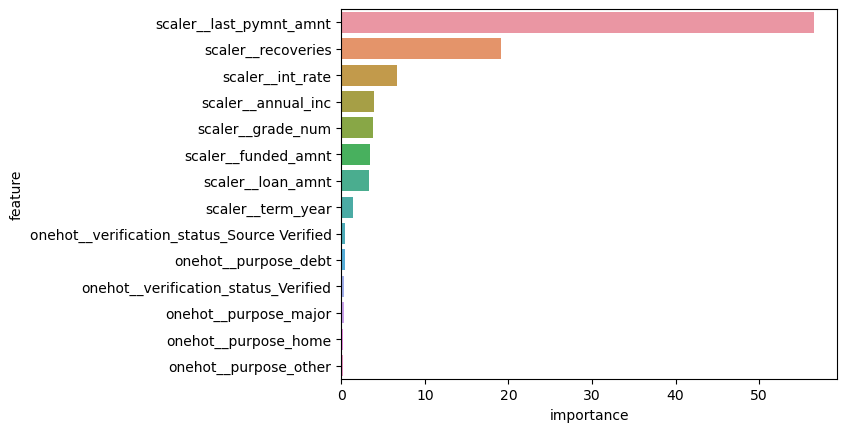

In [84]:
sns.barplot(data=df_imp, x = 'importance', y = 'feature');

Dari hasil feature importance, terlihat bahwa fitur-fitur yang paling berpengaruh dalam memprediksi default risk adalah:

1. scaler__last_pymnt_amnt (56.5%)
2. scaler__recoveries (19.1%)
3. scaler__int_rate (6.7%)
4. scaler__annual_inc (3.9%)
5. scaler__grade_num (3.8%)

Rekomendasi bisnis yang dapat diambil dari hasil ini adalah:

- Pemberian pinjaman kepada peminjam dengan last payment amount yang tinggi sebaiknya dipertimbangkan secara lebih hati-hati, karena kemungkinan untuk melakukan default lebih kecil.
- Pemberian pinjaman kepada peminjam yang pernah mengalami pengembalian atas keterlambatan atau penundaan sebaiknya juga dipertimbangkan dengan hati-hati karena memiliki pengaruh yang signifikan terhadap risiko default.
- Tingkat bunga yang lebih tinggi cenderung berkontribusi pada risiko default yang lebih tinggi, sehingga perlu dipertimbangkan dengan hati-hati dalam memberikan pinjaman.
- Penghasilan tahunan dan grade kredit juga mempengaruhi risiko default, namun pengaruhnya lebih kecil dibandingkan fitur-fitur sebelumnya.


Dengan demikian, rekomendasi bisnisnya adalah untuk mempertimbangkan faktor-faktor tersebut secara hati-hati dan melakukan penilaian risiko yang cermat sebelum memberikan pinjaman kepada calon peminjam.

# Kesimpulan

Dari classification report, model Random Forest Classifier memiliki nilai recall yang cukup baik yaitu 0.87 untuk kelas 1 (default) dan 0.92 untuk kelas 0 (non-default), dengan nilai f1-score sebesar 0.81 untuk kelas 1 dan 0.94 untuk kelas 0. Hal ini menunjukkan bahwa model ini mampu mengidentifikasi sebagian besar data yang seharusnya masuk ke dalam kelas default.

Namun, meskipun recall untuk kelas 1 cukup baik, perlu diingat bahwa keputusan untuk memberikan pinjaman kepada seseorang yang kemudian tidak mampu membayar akan berdampak negatif bagi lembaga keuangan dan pelanggan lainnya. Oleh karena itu, recall yang tinggi perlu dipertimbangkan sebagai salah satu faktor dalam mengevaluasi model, tetapi tidak boleh menjadi satu-satunya faktor.

Dari nilai ROC AUC score dan balanced score, model Random Forest Classifier juga menunjukkan performa yang cukup baik dalam memprediksi loan default risk. Namun, dalam kasus loan default risk, sebaiknya juga mempertimbangkan faktor-faktor lain seperti biaya false positive dan false negative untuk menentukan apakah model sudah cukup baik untuk diimplementasikan di dalam perusahaan atau masih perlu diperbaiki.

Recall pada kasus default risk mengacu pada kemampuan model untuk mendeteksi semua orang yang sebenarnya akan default sebagai kelas positif. Dalam hal ini, kelas positif adalah orang yang sebenarnya akan default. Recall akan menghitung berapa banyak dari semua orang yang sebenarnya akan default yang telah dideteksi dengan benar oleh model. Sebagai contoh, jika ada 100 orang yang sebenarnya akan default dan model hanya berhasil mendeteksi 80 dari mereka, maka recall akan menjadi 80%. Dalam konteks ini, recall menjadi sangat penting karena untuk meminimalkan risiko kerugian, penting untuk dapat mendeteksi semua orang yang mungkin akan default dan mengambil tindakan yang diperlukan. Oleh karena itu, semakin tinggi recall, semakin baik model dalam mengidentifikasi orang-orang yang berisiko default dan semakin kecil kemungkinan terjadinya kerugian.
